# Import the main libiraries

In [1]:
import textblob
# ^^^ pyforest auto-imports - don't write above this line
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns 
import matplotlib.pyplot as plt
import cufflinks as cf
%matplotlib inline
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
cf.go_offline();
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option("display.max_columns",None)

# Load the DataSet

In [2]:
data = pd.read_csv("../data/Reviews.csv")

In [3]:
df=data.copy()

# inspect the Data

In [4]:
df.head()

,Unnamed: 0,Customer Name,Customer review
0,0,Lizz,Appearance: Looks great and is lightweight. Th...
1,1,Kailua Sam,"I had an identical watch from ""Yamay"" which no..."
2,2,mathman419,"I purchased originally in July 2022, and I was..."
3,3,AZN8TV,I ordered this as a step tracker. What I got w...
4,4,Jeff Brown Jr.,I've had this model/brand of watch before. Aft...


remove unnecessary columns

In [5]:
# remove "Unnamed: 0" column from data
df = df.drop("Unnamed: 0",axis=1)

# summary

In [6]:
# Summary to all columns 
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

,column,dtypes,nunique,sum_null
0,Customer Name,object,1291,1
1,Customer review,object,1440,7


# check the duplicates row

In [7]:
df.duplicated().sum()

11

> their is 11 duplicate row we should remove them

In [10]:
df = df.drop_duplicates()

# check the null in rows

In [11]:
df.isnull().sum()

Customer Name      1
Customer review    7
dtype: int64

> their is 7 nulls in reviews and 1 null in names we may drop them

In [15]:
# drop nulls
df = df.dropna()

# Some text cleaning

In [109]:
# Remove any punctuation and any numbers from text and convert all words to lower case
rt = lambda x: re.sub("[^a-z A-Z]",'',x)
df["Customer review"] = df["Customer review"].map(rt)
df["Customer review"] = df["Customer review"].str.lower()

In [110]:
df.head(2)

,Customer Name,Customer review
0,Lizz,appearance looks great and is lightweight the ...
1,Kailua Sam,i had an identical watch from yamay which no l...


In [118]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [126]:
df[["polarity","subjectivity"]]= df["Customer review"].apply(lambda Text:pd.Series(TextBlob(Text).sentiment))

for index ,row in df["Customer review"].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    if neg>pos:
        df.loc[index,"sentiment"] = "negative"
    elif neg<pos:
        df.loc[index,"sentiment"] = "positive"
    else:
        df.loc[index,"sentiment"] = "neutral"

In [128]:
df.head()

,Customer Name,Customer review,polarity,subjectivity,sentiment
0,Lizz,appearance looks great and is lightweight the ...,0.275250,0.545284,positive
1,Kailua Sam,i had an identical watch from yamay which no l...,0.012249,0.435925,positive
2,mathman419,i purchased originally in july and i was very...,0.248136,0.615955,positive
3,AZN8TV,i ordered this as a step tracker what i got wa...,0.211806,0.653483,positive
4,Jeff Brown Jr.,ive had this modelbrand of watch before after ...,0.088961,0.553247,positive


# Visualize the number of positive,negative and neutral reviews

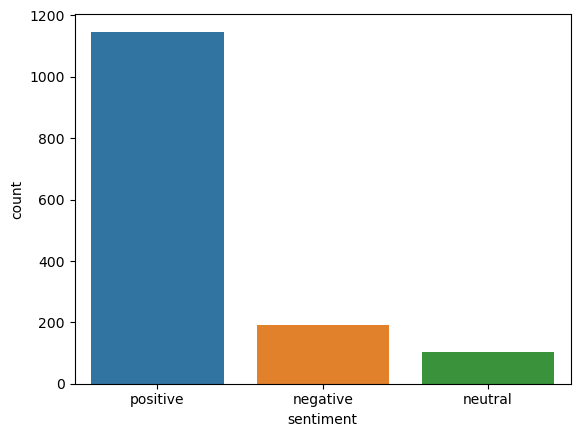

In [161]:
sns.countplot(data=df,x="sentiment");